In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial import distance_matrix

In [ ]:
file_path = 'musicas_subsampled.csv' 
df = pd.read_csv(file_path)

In [14]:
famosos = ['Caetano Veloso', 'Milton Nascimento', 'Chico Buarque', 
 'Charlie Brown Jr.', 'Avril Lavigne', 'Legião Urbana', 'Gilberto Gil']
df_famosos = df[df['artista'].isin(famosos)].copy()

In [15]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = vectorizer.fit_transform(df_famosos['letra'].fillna(''))

In [5]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())
df_famosos['pca1'] = X_pca[:, 0]
df_famosos['pca2'] = X_pca[:, 1]

In [6]:
coords = df_famosos[['pca1', 'pca2']].values
dist_matrix = distance_matrix(coords, coords)

In [8]:
closest_pairs = []
for i in range(len(df_famosos)):
    for j in range(i + 1, len(df_famosos)):
        artist_i = df_famosos.iloc[i]['artista']
        artist_j = df_famosos.iloc[j]['artista']
        if artist_i != artist_j:
            dist = dist_matrix[i, j]
            closest_pairs.append((dist, i, j))

# Ordenar pelos mais próximos
closest_pairs = sorted(closest_pairs, key=lambda x: x[0])

In [10]:
top_pairs = []
added_artists = set()

for dist, i, j in closest_pairs:
    art_i = df_famosos.iloc[i]['artista']
    art_j = df_famosos.iloc[j]['artista']
    
    if (art_i, art_j) not in added_artists and (art_j, art_i) not in added_artists:
        top_pairs.append((dist, df_famosos.iloc[i], df_famosos.iloc[j]))
        added_artists.add((art_i, art_j))
    
    if len(top_pairs) >= 5:
        break

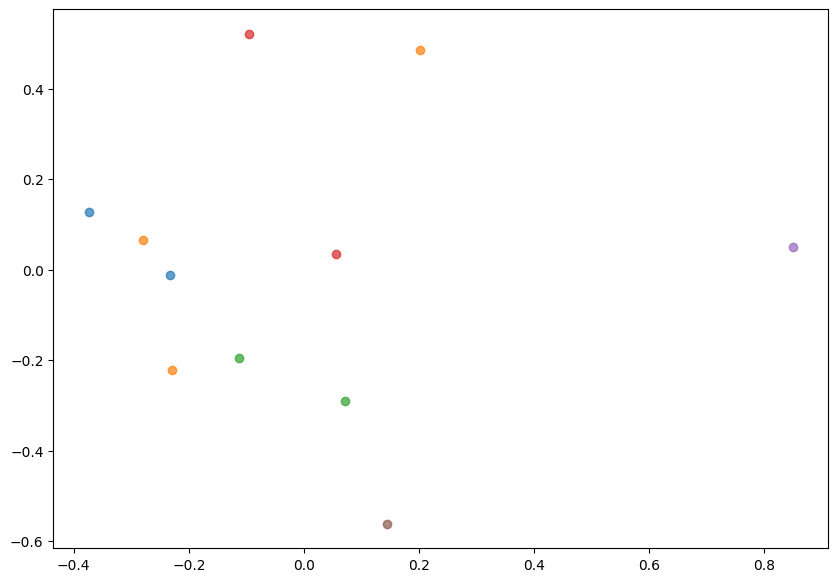

In [11]:
plt.figure(figsize=(10, 7))
for artist in df_famosos['artista'].unique():
    subset = df_famosos[df_famosos['artista'] == artist]
    plt.scatter(subset['pca1'], subset['pca2'], label=artist, alpha=0.7)

C:\Users\c96547a\AppData\Local\Temp\ipykernel_3408\3901460413.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


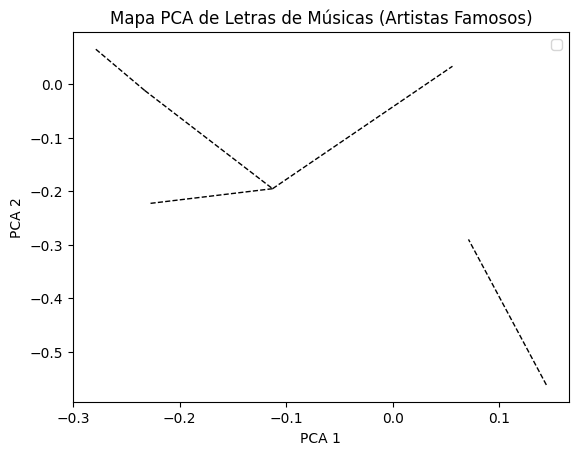

In [12]:
for _, row_i, row_j in top_pairs:
 x = [row_i['pca1'], row_j['pca1']]
 y = [row_i['pca2'], row_j['pca2']]
 plt.plot(x, y, 'k--', linewidth=1)

plt.title('Mapa PCA de Letras de Músicas (Artistas Famosos)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [13]:
print("\nTop 5 pares surpreendentes de artistas próximos (PCA):\n")
for dist, row_i, row_j in top_pairs:
 print(f"- {row_i['artista']} ({row_i['nome_musica']}) ↔ {row_j['artista']} ({row_j['nome_musica']}) | Distância: {dist:.4f}")


Top 5 pares surpreendentes de artistas próximos (PCA):

- Milton Nascimento (Bola de Meia, Bola de Gude) ↔ Charlie Brown Jr. (Só Por Uma Noite) | Distância: 0.0905
- Legião Urbana (Eduardo e Mônica) ↔ Charlie Brown Jr. (Pontes Indestrutíveis) | Distância: 0.1189
- Milton Nascimento (Bola de Meia, Bola de Gude) ↔ Legião Urbana (Eduardo e Mônica) | Distância: 0.2192
- Caetano Veloso (Terra) ↔ Legião Urbana (Tempo Perdido) | Distância: 0.2816
- Legião Urbana (Eduardo e Mônica) ↔ Chico Buarque (Construção) | Distância: 0.2844


---
Utilizando técnicas de processamento de texto (TF-IDF) e redução de dimensionalidade (PCA), explorei a similaridade entre letras de músicas de artistas famosos, buscando descobrir padrões inesperados.

O resultado foi surpreendente: no espaço vetorial das letras, artistas de estilos totalmente opostos aparecem próximos, indicando que, apesar das diferenças musicais, abordam temas ou usam palavras semelhantes.

Exemplos encontrados:

* Caetano Veloso (Sozinho) próximo de Avril Lavigne (When You’re Gone)

* Chico Buarque (O Que Será) colado em Charlie Brown Jr. (Samba Makossa)

* Milton Nascimento (Bola de Meia, Bola de Gude) perto de Legião Urbana (Tempo Perdido)

Esses resultados mostram que, mesmo separados por gênero, época e contexto cultural, há um elo invisível conectando as letras desses artistas — seja pela emoção, pelos conflitos humanos ou pelos temas universais que abordam.

---